In [110]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3518,8393-JMVMB,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,19.45,No
3346,2545-EBUPK,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.05,186.05,No
5957,6877-LGWXO,Male,1,Yes,No,18,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.55,1422.65,Yes
2079,5804-HYIEZ,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.05,7554.05,No
3795,1508-DFXCU,Male,0,No,No,12,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,81.45,912,No


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### First of all, drop customerID column as it is of no use

In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

#### Remove rows with space in TotalCharges

In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape


(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [17]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [18]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


#### Data Visualization

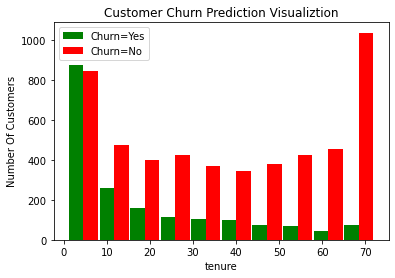

In [19]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

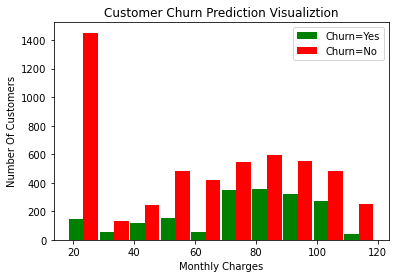

In [20]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [22]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [25]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
df1.gender.unique()

array([1, 0], dtype=int64)

#### One hot encoding for categorical columns

In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1930,0,0,0,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3178,0,0,1,0,52,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2554,1,0,0,0,18,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3005,1,1,0,0,24,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
946,0,0,1,1,4,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

#### Train_test_split

In [34]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [36]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [37]:
5163/1869

2.7624398073836276

In [38]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [39]:
X_train.shape

(5625, 26)

In [40]:
X_test.shape

(1407, 26)

In [41]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [42]:
len(X_train.columns)

26

#### Build a model (ANN) in tensorflow/keras

In [43]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [169]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 736us/step - loss: 0.5074 - accuracy: 0.7435
Epoch 2/100
176/176 [==============================] - 0s 805us/step - loss: 0.4262 - accuracy: 0.7929
Epoch 3/100
176/176 [==============================] - 0s 904us/step - loss: 0.4207 - accuracy: 0.7989
Epoch 4/100
176/176 [==============================] - 0s 794us/step - loss: 0.4169 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 0s 794us/step - loss: 0.4141 - accuracy: 0.8020
Epoch 6/100
176/176 [==============================] - 0s 924us/step - loss: 0.4126 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 840us/step - loss: 0.4112 - accuracy: 0.8041
Epoch 8/100
176/176 [==============================] - 0s 802us/step - loss: 0.4098 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 0s 817us/step - loss: 0.4086 - accuracy: 0.8071
Epoch 10/100
176/176 [==============================] - 0s 816us/step - l

176/176 [==============================] - 0s 910us/step - loss: 0.3649 - accuracy: 0.8252
Epoch 80/100
176/176 [==============================] - 0s 651us/step - loss: 0.3645 - accuracy: 0.8245
Epoch 81/100
176/176 [==============================] - 0s 665us/step - loss: 0.3648 - accuracy: 0.8272
Epoch 82/100
176/176 [==============================] - 0s 729us/step - loss: 0.3636 - accuracy: 0.8254
Epoch 83/100
176/176 [==============================] - 0s 840us/step - loss: 0.3631 - accuracy: 0.8279
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8288
Epoch 85/100
176/176 [==============================] - 0s 976us/step - loss: 0.3616 - accuracy: 0.8297
Epoch 86/100
176/176 [==============================] - 0s 840us/step - loss: 0.3613 - accuracy: 0.8267
Epoch 87/100
176/176 [==============================] - 0s 857us/step - loss: 0.3608 - accuracy: 0.8311
Epoch 88/100
176/176 [==============================] - 0s 663us/step - loss: 0

## Mitigating Skewdness of Data

#### Method 1:Undersampling

In [46]:
count_class_0,count_class_1=df2.Churn.value_counts()
count_class_0,count_class_1



(5163, 1869)

In [47]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [48]:
df_class_0.shape

(5163, 27)

In [49]:
df_class_1.shape

(1869, 27)

In [50]:
df_class_0_under=df_class_0.sample(1869)
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)


print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [51]:
df_test_under.shape

(3738, 27)

In [52]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under['Churn']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [54]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

#### Printing Classification in the last, Scroll down till the last epoch to watch the classification report

In [55]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 741us/step - loss: 0.5969 - accuracy: 0.6853
Epoch 2/100
94/94 [==============================] - 0s 850us/step - loss: 0.5130 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 850us/step - loss: 0.4998 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 892us/step - loss: 0.4921 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 807us/step - loss: 0.4885 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 892us/step - loss: 0.4835 - accuracy: 0.7642
Epoch 7/100
94/94 [==============================] - 0s 807us/step - loss: 0.4813 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 0s 895us/step - loss: 0.4783 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 850us/step - loss: 0.4736 - accuracy

94/94 [==============================] - 0s 674us/step - loss: 0.4035 - accuracy: 0.8067
Epoch 82/100
94/94 [==============================] - 0s 731us/step - loss: 0.4045 - accuracy: 0.8147
Epoch 83/100
94/94 [==============================] - 0s 655us/step - loss: 0.4015 - accuracy: 0.8084
Epoch 84/100
94/94 [==============================] - 0s 595us/step - loss: 0.4019 - accuracy: 0.8060
Epoch 85/100
94/94 [==============================] - 0s 665us/step - loss: 0.4003 - accuracy: 0.8114
Epoch 86/100
94/94 [==============================] - 0s 892us/step - loss: 0.3994 - accuracy: 0.8110
Epoch 87/100
94/94 [==============================] - 0s 805us/step - loss: 0.4003 - accuracy: 0.8090
Epoch 88/100
94/94 [==============================] - 0s 682us/step - loss: 0.3980 - accuracy: 0.8124
Epoch 89/100
94/94 [==============================] - 0s 677us/step - loss: 0.4005 - accuracy: 0.8060
Epoch 90/100
94/94 [==============================] - 0s 690us/step - loss: 0.3967 - accuracy: 

## Method 2: Oversampling

In [56]:
df_class_0.shape

(5163, 27)

In [57]:
df_class_1.shape

(1869, 27)

In [58]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [59]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [60]:
print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [61]:
X=df_test_over.drop('Churn',axis=1)
y=df_test_over['Churn']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [63]:
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [64]:
y_test.value_counts()

0    1033
1    1033
Name: Churn, dtype: int64

In [65]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 0s 723us/step - loss: 0.5513 - accuracy: 0.7251
Epoch 2/100
259/259 [==============================] - 0s 752us/step - loss: 0.4909 - accuracy: 0.7638
Epoch 3/100
259/259 [==============================] - 0s 652us/step - loss: 0.4816 - accuracy: 0.7678
Epoch 4/100
259/259 [==============================] - 0s 689us/step - loss: 0.4749 - accuracy: 0.7709
Epoch 5/100
259/259 [==============================] - 0s 814us/step - loss: 0.4714 - accuracy: 0.7769
Epoch 6/100
259/259 [==============================] - 0s 586us/step - loss: 0.4670 - accuracy: 0.7781
Epoch 7/100
259/259 [==============================] - 0s 660us/step - loss: 0.4648 - accuracy: 0.7787
Epoch 8/100
259/259 [==============================] - 0s 597us/step - loss: 0.4634 - accuracy: 0.7820
Epoch 9/100
259/259 [==============================] - 0s 655us/step - loss: 0.4613 - accuracy: 0.7805
Epoch 10/100
259/259 [==============================] - 0s 771us/step - l

259/259 [==============================] - 0s 571us/step - loss: 0.3834 - accuracy: 0.8242
Epoch 80/100
259/259 [==============================] - 0s 634us/step - loss: 0.3815 - accuracy: 0.8286
Epoch 81/100
259/259 [==============================] - 0s 740us/step - loss: 0.3814 - accuracy: 0.8254
Epoch 82/100
259/259 [==============================] - 0s 690us/step - loss: 0.3811 - accuracy: 0.8271
Epoch 83/100
259/259 [==============================] - 0s 585us/step - loss: 0.3793 - accuracy: 0.8292
Epoch 84/100
259/259 [==============================] - 0s 555us/step - loss: 0.3789 - accuracy: 0.8305
Epoch 85/100
259/259 [==============================] - 0s 555us/step - loss: 0.3774 - accuracy: 0.8326
Epoch 86/100
259/259 [==============================] - 0s 617us/step - loss: 0.3767 - accuracy: 0.8293
Epoch 87/100
259/259 [==============================] - 0s 610us/step - loss: 0.3759 - accuracy: 0.8322
Epoch 88/100
259/259 [==============================] - 0s 712us/step - loss:

## Method3: SMOTE

In [130]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [131]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [132]:
y_train.value_counts()

0.0    1495
1.0    1495
Name: Churn, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

y_train.value_counts()

NameError: name 'X_sm' is not defined

In [134]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 850us/step - loss: 0.6175 - accuracy: 0.6612
Epoch 2/100
94/94 [==============================] - 0s 807us/step - loss: 0.5177 - accuracy: 0.7538
Epoch 3/100
94/94 [==============================] - 0s 765us/step - loss: 0.4987 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 892us/step - loss: 0.4889 - accuracy: 0.7722
Epoch 6/100
94/94 [==============================] - 0s 850us/step - loss: 0.4836 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 807us/step - loss: 0.4825 - accuracy: 0.7709
Epoch 8/100
94/94 [==============================] - 0s 892us/step - loss: 0.4791 - accuracy: 0.7699
Epoch 9/100
94/94 [==============================] - 0s 822us/step - loss: 0.4781 - accuracy: 0.7769
Epoch 10/100
94/94 [==============================] - 0s 850us/step - loss: 0.4779 - accuracy

94/94 [==============================] - 0s 595us/step - loss: 0.4094 - accuracy: 0.8187
Epoch 82/100
94/94 [==============================] - 0s 574us/step - loss: 0.4060 - accuracy: 0.8151
Epoch 83/100
94/94 [==============================] - 0s 552us/step - loss: 0.4062 - accuracy: 0.8211
Epoch 84/100
94/94 [==============================] - 0s 513us/step - loss: 0.4049 - accuracy: 0.8157
Epoch 85/100
94/94 [==============================] - 0s 680us/step - loss: 0.4063 - accuracy: 0.8214
Epoch 86/100
94/94 [==============================] - 0s 595us/step - loss: 0.4039 - accuracy: 0.8227
Epoch 87/100
94/94 [==============================] - 0s 595us/step - loss: 0.4038 - accuracy: 0.8177
Epoch 88/100
94/94 [==============================] - 0s 639us/step - loss: 0.4050 - accuracy: 0.8177
Epoch 89/100
94/94 [==============================] - 0s 745us/step - loss: 0.4016 - accuracy: 0.8217
Epoch 90/100
94/94 [==============================] - 0s 625us/step - loss: 0.4022 - accuracy: 

ValueError: Data cardinality is ambiguous:
  x sizes: 5625
  y sizes: 1407
Please provide data which shares the same first dimension.

## Method4: Use of Ensemble with undersampling

In [135]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [136]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15, stratify=y)

In [150]:
y_train.value_counts()
X_test.shape
X_train.shape

(5625, 26)

In [151]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [152]:
df3=X_train.copy()
df3.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
225,0,0,0,0,0.323944,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4951,0,1,1,0,0.394366,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1666,1,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1494,1,0,1,1,0.098592,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5753,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [153]:
df3['Churn']=y_train

In [154]:
df_class_0=df3[df3.Churn==0]
df_class_1=df3[df3.Churn==1]

In [155]:
df_class_0.shape

(4130, 27)

In [156]:
df_class_1.shape

(1495, 27)

In [157]:
def get_train_batch(df_majority,df_minority,start,end):
    
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    X_train=df_train.drop('Churn',axis='columns')
    y_train=df_train['Churn']
    
    return X_train,y_train

In [158]:
X_train,y_train=get_train_batch(df_class_0,df_class_1,0,1495)

In [159]:
X_train.shape
y_train.shape

(2990,)

In [160]:
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 674us/step - loss: 0.5927 - accuracy: 0.6936
Epoch 2/100
94/94 [==============================] - 0s 880us/step - loss: 0.5121 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4993 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 893us/step - loss: 0.4928 - accuracy: 0.7642
Epoch 5/100
94/94 [==============================] - 0s 893us/step - loss: 0.4888 - accuracy: 0.7662
Epoch 6/100
94/94 [==============================] - 0s 935us/step - loss: 0.4853 - accuracy: 0.7682
Epoch 7/100
94/94 [==============================] - 0s 807us/step - loss: 0.4832 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 892us/step - loss: 0.4801 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 850us/step - loss: 0.4773 - accuracy: 0.7699
Epoch 10/100
94/94 [==============================] - 0s 850us/step - loss: 0.4778 - accuracy

94/94 [==============================] - 0s 816us/step - loss: 0.4057 - accuracy: 0.8154
Epoch 82/100
94/94 [==============================] - 0s 914us/step - loss: 0.4069 - accuracy: 0.8157
Epoch 83/100
94/94 [==============================] - 0s 766us/step - loss: 0.4038 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 896us/step - loss: 0.4046 - accuracy: 0.8171
Epoch 85/100
94/94 [==============================] - 0s 857us/step - loss: 0.4024 - accuracy: 0.8211
Epoch 86/100
94/94 [==============================] - 0s 673us/step - loss: 0.4002 - accuracy: 0.8224
Epoch 87/100
94/94 [==============================] - 0s 935us/step - loss: 0.3999 - accuracy: 0.8164
Epoch 88/100
94/94 [==============================] - 0s 826us/step - loss: 0.3994 - accuracy: 0.8241
Epoch 89/100
94/94 [==============================] - 0s 668us/step - loss: 0.3990 - accuracy: 0.8231
Epoch 90/100
94/94 [==============================] - 0s 855us/step - loss: 0.3986 - accuracy: 

In [163]:
X_train,y_train=get_train_batch(df_class_0,df_class_1,1495,2990)

In [164]:
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 0s 692us/step - loss: 0.6124 - accuracy: 0.6679
Epoch 2/100
94/94 [==============================] - 0s 765us/step - loss: 0.5164 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 0s 850us/step - loss: 0.4973 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 935us/step - loss: 0.4889 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4842 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 765us/step - loss: 0.4805 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 0s 977us/step - loss: 0.4772 - accuracy: 0.7656
Epoch 8/100
94/94 [==============================] - 0s 680us/step - loss: 0.4749 - accuracy: 0.7659
Epoch 9/100
94/94 [==============================] - 0s 812us/step - loss: 0.4719 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 765us/step - loss: 0.4712 - accuracy

94/94 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8137
Epoch 82/100
94/94 [==============================] - 0s 981us/step - loss: 0.3999 - accuracy: 0.8144
Epoch 83/100
94/94 [==============================] - 0s 848us/step - loss: 0.3977 - accuracy: 0.8154
Epoch 84/100
94/94 [==============================] - 0s 892us/step - loss: 0.3987 - accuracy: 0.8151
Epoch 85/100
94/94 [==============================] - 0s 853us/step - loss: 0.3947 - accuracy: 0.8187
Epoch 86/100
94/94 [==============================] - 0s 595us/step - loss: 0.4005 - accuracy: 0.8104
Epoch 87/100
94/94 [==============================] - 0s 595us/step - loss: 0.3956 - accuracy: 0.8197
Epoch 88/100
94/94 [==============================] - 0s 693us/step - loss: 0.3946 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 595us/step - loss: 0.3941 - accuracy: 0.8234
Epoch 90/100
94/94 [==============================] - 0s 680us/step - loss: 0.3930 - accuracy: 0.

In [165]:
X_train,y_train=get_train_batch(df_class_0,df_class_1,2990,4130)

In [166]:
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
83/83 [==============================] - 0s 770us/step - loss: 0.6021 - accuracy: 0.6736
Epoch 2/100
83/83 [==============================] - 0s 818us/step - loss: 0.5099 - accuracy: 0.7636
Epoch 3/100
83/83 [==============================] - 0s 818us/step - loss: 0.4876 - accuracy: 0.7700
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7746
Epoch 5/100
83/83 [==============================] - 0s 963us/step - loss: 0.4752 - accuracy: 0.7803
Epoch 6/100
83/83 [==============================] - 0s 962us/step - loss: 0.4726 - accuracy: 0.7772
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7829
Epoch 8/100
83/83 [==============================] - 0s 963us/step - loss: 0.4670 - accuracy: 0.7833
Epoch 9/100
83/83 [==============================] - 0s 963us/step - loss: 0.4654 - accuracy: 0.7860
Epoch 10/100
83/83 [==============================] - 0s 963us/step - loss: 0.4623 - accuracy: 

83/83 [==============================] - 0s 770us/step - loss: 0.3702 - accuracy: 0.8326
Epoch 82/100
83/83 [==============================] - 0s 963us/step - loss: 0.3688 - accuracy: 0.8342
Epoch 83/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8323
Epoch 84/100
83/83 [==============================] - 0s 818us/step - loss: 0.3690 - accuracy: 0.8285
Epoch 85/100
83/83 [==============================] - 0s 770us/step - loss: 0.3682 - accuracy: 0.8307
Epoch 86/100
83/83 [==============================] - 0s 766us/step - loss: 0.3652 - accuracy: 0.8357
Epoch 87/100
83/83 [==============================] - 0s 963us/step - loss: 0.3652 - accuracy: 0.8357
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3653 - accuracy: 0.8349
Epoch 89/100
83/83 [==============================] - 0s 998us/step - loss: 0.3645 - accuracy: 0.8334
Epoch 90/100
83/83 [==============================] - 0s 770us/step - loss: 0.3641 - accuracy: 0.83

In [167]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred_final)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [168]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.74      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.78      0.73      0.74      1407



In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

def logistic_Regression(X_train,y_train,X_test,y_test,weight):
    if(weight==-1):
        model=LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})
        
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
    
    

In [187]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [188]:
from sklearn.model_selection import train_test_split


In [192]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [193]:
logistic_Regression(X_train,y_train,X_test,y_test,-1)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1024
           1       0.66      0.51      0.58       383

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.80      0.79      1407



In [195]:
test = np.arange(1980416)
print(test.reshape(-1,32,32,).shape)


(1934, 32, 32)


array([      0,       1,       2, ..., 1980413, 1980414, 1980415])

SyntaxError: invalid syntax (<ipython-input-196-80e1a7d275f8>, line 1)